In [9]:
import numpy as np

import bilby



In [37]:
def make_bilby_waveform(geocent_time=1126259642.413):
    # Specify the output directory and the name of the simulation.
    outdir = 'outdir'
    label = 'bns_example'
    bilby.core.utils.setup_logger(outdir=outdir, label=label)

    # Set up a random seed for result reproducibility.  This is optional!
    np.random.seed(88170235)

    # We are going to inject a binary neutron star waveform.  We first establish a
    # dictionary of parameters that includes all of the different waveform
    # parameters, including masses of the two black holes (mass_1, mass_2),
    # aligned spins of both black holes (chi_1, chi_2), etc.
    injection_parameters = dict(
        mass_1=15, mass_2=15, chi_1=0.02, chi_2=0.02, luminosity_distance=50.,
        theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=geocent_time,
        ra=1.375, dec=-1.2108)

    # Set the duration and sampling frequency of the data segment that we're going
    # to inject the signal into. For the
    # TaylorF2 waveform, we cut the signal close to the isco frequency
    duration = 32
    sampling_frequency = 2 * 1024
    start_time = injection_parameters['geocent_time'] + 2 - duration

    # Fixed arguments passed into the source model. The analysis starts at 40 Hz.
    waveform_arguments = dict(waveform_approximant='SEOBNRv4_opt',
                              reference_frequency=50., minimum_frequency=20.0)

    # Create the waveform_generator using a LAL Binary Neutron Star source function
    waveform_generator = bilby.gw.WaveformGenerator(
        duration=duration, sampling_frequency=sampling_frequency,
        frequency_domain_source_model=bilby.gw.source.lal_binary_neutron_star,
        parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters,
        waveform_arguments=waveform_arguments)
    
    return waveform_generator

In [38]:
waveform_generator = make_bilby_waveform(geocent_time=1126259642.413)

In [39]:
td = waveform_generator.time_domain_strain(injection_parameters)

In [40]:
fd = waveform_generator.frequency_domain_strain(injection_parameters)

In [43]:
waveform_generator.time_array

array([0.00000000e+00, 4.88281250e-04, 9.76562500e-04, ...,
       3.19985352e+01, 3.19990234e+01, 3.19995117e+01])

In [44]:
waveform_generator.frequency_array

array([0.00000000e+00, 3.12500000e-02, 6.25000000e-02, ...,
       1.02393750e+03, 1.02396875e+03, 1.02400000e+03])

In [45]:
import matplotlib
import matplotlib.pyplot as plt

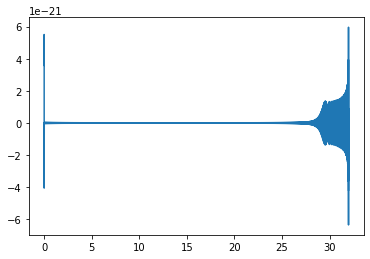

In [56]:
plt.figure()
plt.plot(waveform_generator.time_array, td['plus'])
# plt.xlim(-0.01,0.01)
# plt.xlim(31, 32.1)

In [47]:
# the peak of the waveform is rotated such that it is at t=0.

In [14]:
def cyclic_time_shift(y, time_shift, delta_t):
    """
    y: real valued data to time shift
    time_shift: -val shift left, +ve values shift right. Time to shift y by.
    delta_t: time grid spacing for input y array.
    """
    ytilde = np.fft.fft(y)
    
    freqs = np.fft.fftfreq(len(ytilde), delta_t)
    
    fac = np.exp(-2*np.pi*1.j*freqs*time_shift)
    
    return np.real(np.fft.ifft(ytilde * fac))

In [15]:
x,y = waveform_generator.time_array, td['plus']

In [16]:
yshift = cyclic_time_shift(y, -0.5, x[1]-x[0])

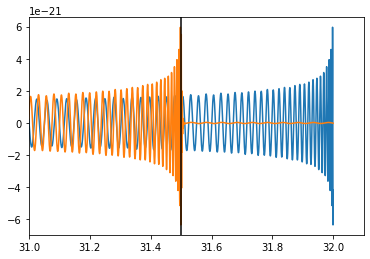

In [20]:
plt.figure()
plt.plot(waveform_generator.time_array, td['plus'])
plt.plot(x, yshift)

plt.xlim(31, 32.1)
plt.axvline(31.5, c='k')
# plt.xlim(31.4, 31.6)

# what does pycbc do

In [ ]:
# https://pycbc.org/tutorials/3/3_WaveformMatchedFilter/

In [23]:
import pycbc.waveform

In [24]:
h1,h2 = pycbc.waveform.get_td_waveform(approximant="SEOBNRv4_opt", mass1=15, mass2=15, f_lower=15, delta_t=1/4096)

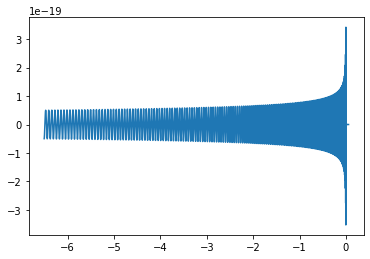

In [27]:
plt.figure()
plt.plot(h1.sample_times, h1)

In [28]:
h1.duration

6.564453125

In [29]:
h1.start_time

LIGOTimeGPS(-6, -507335662)

In [46]:
h1shift = h1.cyclic_time_shift(h1.start_time)

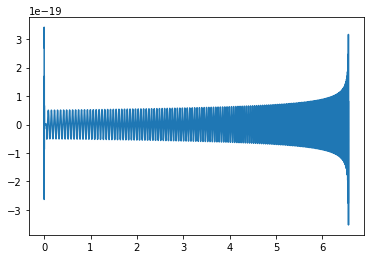

In [47]:
plt.figure()
plt.plot(h1shift.sample_times, h1shift)